# Декомпозиция и реконструкция изображения методом главных компонент

## Вычисление главных компонент и трансформация данных

Модули, настройка, функции.

In [1]:
import numpy as np
np.random.seed(seed=333)
import matplotlib.pyplot as plt
from skimage import color, io
from sklearn.decomposition import PCA as skl_pca

Загрузка и вывод изображения. По аналогии с матрицей признаков: каждый столбец изображения &mdash; это признак, каждая строка &mdash; объект.

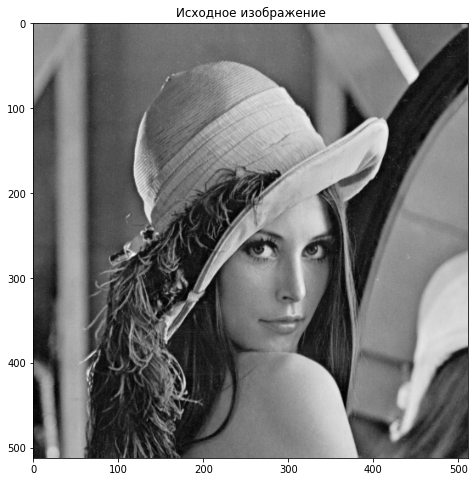

In [2]:
# Загружка изображения, перевод его в ЧБ формат и вывод
X_rgb = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
X = color.rgb2gray(X_rgb)
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(X, cmap='gray')
ax.set_title('Исходное изображение')
plt.show()

Стандартизация данных.

In [3]:
X_std = X.std(axis=0, ddof=1)
X_mean = X.mean(axis=0)

X_standardized = np.zeros_like(X)
for i in range(X_standardized.shape[1]):
  X_standardized[:, i] = (X[:, i] - X_mean[i]) / X_std[i]

Ковариационная матрица. Для стандартизированных признаков она совпадает с корреляционной матрицей.

In [4]:
CM = np.cov(X_standardized.T)
print(f'Матрица ковариации стандартизированных признаков:\n {CM.round(2)}')

Матрица ковариации стандартизированных признаков:
 [[ 1.    1.    0.99 ... -0.24 -0.22 -0.2 ]
 [ 1.    1.    0.99 ... -0.24 -0.22 -0.2 ]
 [ 0.99  0.99  1.   ... -0.26 -0.25 -0.23]
 ...
 [-0.24 -0.24 -0.26 ...  1.    1.    0.99]
 [-0.22 -0.22 -0.25 ...  1.    1.    0.99]
 [-0.2  -0.2  -0.23 ...  0.99  0.99  1.  ]]


Собственные векторы ковариационной матрицы.

In [5]:
# Вектор собственных значений и матрица собственных векторов ков. матрицы
ev, EV = np.linalg.eig(CM)
# Упорядочивание собственных значений и собственных векторов по убыванию первых,
# т.к. главная компонента определяется наибольшим собственным значением
idx = ev.argsort()[::-1]
ev, EV = ev[idx], EV[:, idx]
print('Вектор собственных значений матрицы ковариации:\n',\
  ev.round(2))
print('\nМатрица собственных векторов матрицы ковариации (столбцы):\n',\
  EV.round(2))

Вектор собственных значений матрицы ковариации:
 [ 1.1271e+02  7.7920e+01  4.7350e+01  4.0170e+01  3.3080e+01  2.4750e+01
  2.1640e+01  1.2840e+01  1.0090e+01  8.9800e+00  8.3900e+00  6.5100e+00
  6.4300e+00  5.8800e+00  5.4400e+00  4.5000e+00  4.2300e+00  4.1000e+00
  3.8200e+00  3.2700e+00  3.0500e+00  2.7700e+00  2.7400e+00  2.3600e+00
  2.3400e+00  2.3000e+00  2.1000e+00  2.0100e+00  1.8600e+00  1.7200e+00
  1.6800e+00  1.6200e+00  1.5000e+00  1.4400e+00  1.3200e+00  1.2500e+00
  1.2100e+00  1.1800e+00  1.1100e+00  1.0800e+00  1.0200e+00  9.5000e-01
  9.3000e-01  9.2000e-01  8.8000e-01  8.1000e-01  7.8000e-01  7.7000e-01
  7.0000e-01  7.0000e-01  6.5000e-01  6.4000e-01  6.1000e-01  5.9000e-01
  5.5000e-01  5.4000e-01  5.3000e-01  5.3000e-01  5.0000e-01  4.9000e-01
  4.8000e-01  4.6000e-01  4.5000e-01  4.3000e-01  4.2000e-01  4.0000e-01
  3.9000e-01  3.7000e-01  3.6000e-01  3.4000e-01  3.4000e-01  3.3000e-01
  3.3000e-01  3.1000e-01  3.1000e-01  3.0000e-01  2.9000e-01  2.8000e-01
  

Проверим матрицу собственных векторов на ортогональность, вычислив $E^T E$.

In [6]:
(EV.T @ EV).round(2)

array([[ 1.  , -0.  ,  0.  , ..., -0.  , -0.  ,  0.  ],
       [-0.  ,  1.  , -0.  , ...,  0.  , -0.  , -0.  ],
       [ 0.  , -0.  ,  1.  , ..., -0.  , -0.  , -0.  ],
       ...,
       [-0.  ,  0.  , -0.  , ...,  1.  ,  0.71, -0.3 ],
       [-0.  , -0.  , -0.  , ...,  0.71,  1.  , -0.28],
       [ 0.  , -0.  , -0.  , ..., -0.3 , -0.28,  1.  ]])

Вычислим координаты признаков в базисе главных компонент. Аналогичным образом трансформируем матрицу ковариации стандартизированных исходных признаков.

По углу между векторами столбцами матрицы ковариации можно судить о силе и знаке линейной зависимости исходных признаков.

In [7]:
# Проекции на базис главных компонент
X_pca = (X_standardized @ EV)
# CM_pca_ = CM.T @ EV

Вычислим матрицу ковариации для преобразованных признаков, а также доли дисперсии, объясненные главными компонентами.

Можно заметить, что в базисе главных компонент признаки распределены так, что их ковариации стали равны нулю: преобразованные признаки линейно независимы.

При этом на первую главную компоненту приходится значительная доля дисперсии. Величина доли в общем случае пропорциональна степени линейной зависимости исходных признаков. 

In [8]:
# Ковариационная матрица для признаков в базисе главных компонент
CM_pca = np.cov(X_pca.T)

# Доли объясненной дисперсии (explained variance ratio) для главных компонент в
# порядке убывания
evr = np.diag(CM_pca) / CM_pca.trace()

print('Матрица ковариации признаков в базисе главных компонент:\n',
  CM_pca.round(2))

print('\nДоли дисперсии, объясненные первой и второй компонентами, %:\n',
  (100 * evr).round(2))

Матрица ковариации признаков в базисе главных компонент:
 [[112.71  -0.     0.   ...  -0.    -0.    -0.  ]
 [ -0.    77.92  -0.   ...   0.     0.    -0.  ]
 [  0.    -0.    47.35 ...  -0.    -0.     0.  ]
 ...
 [ -0.     0.    -0.   ...   0.     0.    -0.  ]
 [ -0.     0.    -0.   ...   0.     0.     0.  ]
 [ -0.    -0.     0.   ...  -0.     0.     0.  ]]

Доли дисперсии, объясненные первой и второй компонентами, %:
 [2.201e+01 1.522e+01 9.250e+00 7.840e+00 6.460e+00 4.830e+00 4.230e+00
 2.510e+00 1.970e+00 1.750e+00 1.640e+00 1.270e+00 1.260e+00 1.150e+00
 1.060e+00 8.800e-01 8.300e-01 8.000e-01 7.500e-01 6.400e-01 5.900e-01
 5.400e-01 5.300e-01 4.600e-01 4.600e-01 4.500e-01 4.100e-01 3.900e-01
 3.600e-01 3.400e-01 3.300e-01 3.200e-01 2.900e-01 2.800e-01 2.600e-01
 2.400e-01 2.400e-01 2.300e-01 2.200e-01 2.100e-01 2.000e-01 1.900e-01
 1.800e-01 1.800e-01 1.700e-01 1.600e-01 1.500e-01 1.500e-01 1.400e-01
 1.400e-01 1.300e-01 1.300e-01 1.200e-01 1.200e-01 1.100e-01 1.100e-01
 1.000e-01 

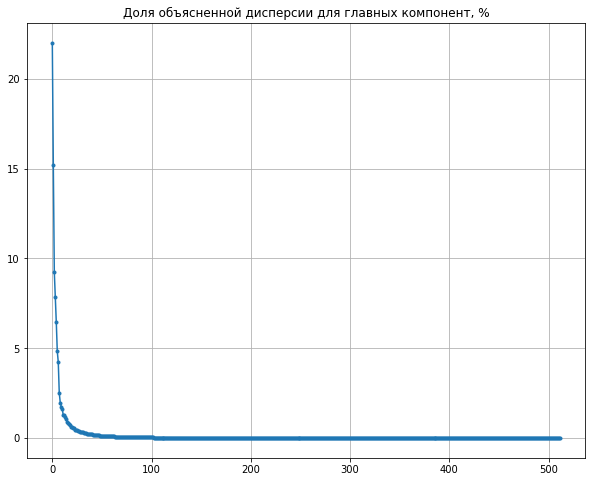

In [9]:
_, ax = plt.subplots(figsize=(10, 8))
ax.plot(100 * evr, '.-')
ax.grid(True)
ax.set_title('Доля объясненной дисперсии для главных компонент, %')
plt.show()

Подсчитаем количество главных компонент, объясняющих около 90% дисперсии.

In [10]:
evr_cs = evr.cumsum()
n = (evr_cs <= 0.9).sum()
print(f'Первые {n} главных(е) компонент(ы) объясняют {evr_cs[n - 1]:.2%} дисперсии')

Первые 27 главных(е) компонент(ы) объясняют 89.79% дисперсии


## Восстановление данных

Восстановленные признаки совпадают с исходными.

In [11]:
X_standardized_restored = X_pca @ EV.T
X_restored = np.zeros_like(X_standardized_restored)
for i in range(X_restored.shape[1]):
  X_restored[:, i] =  X_std[i] * X_standardized_restored[:, i] + X_mean[i]

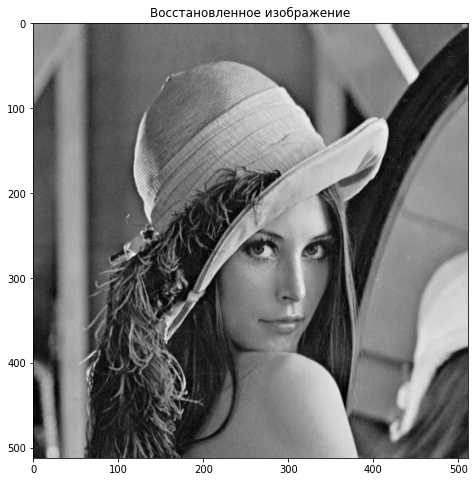

In [12]:
_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(X_restored, cmap='gray')
ax.set_title('Восстановленное изображение')
plt.show()

Сумма модулей ошибок по всем значениями всех признаков (по всем пикселям).

In [13]:
sum(sum(abs(X - X_restored)))

4.281260530814013e-08

Сравним изображения, восстановленные из разного количества наиболее важных компонент.

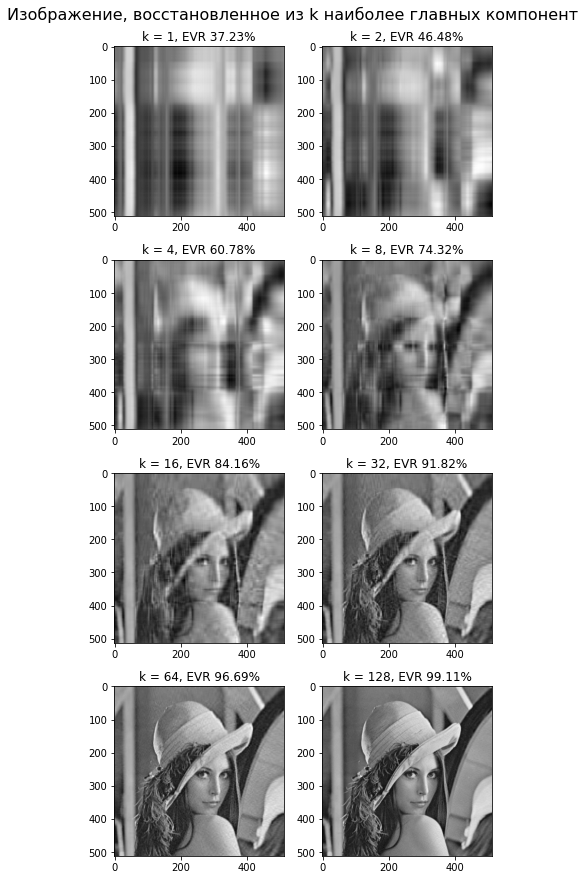

In [14]:
# Сетка графиков
n, m = 4, 2

number_of_main_pc = [2 ** p for p in list(range(n * m))]
X_restored_from_k_pc =\
  np.zeros((n * m, X.shape[0], X.shape[1]))

fig, ax = plt.subplots(nrows=n, ncols=m, figsize=(6, 12))
for i in range(n):
  for j in range(m):
    k = i * m + j
    c = number_of_main_pc[k]
    # Обнуление компонент после k-й
    X_k_main_components = X_pca.copy()
    X_k_main_components[:, c:] = 0
    # Восстановление изображения
    X_restored_from_k_pc[k, ::] = X_k_main_components @ EV.T
    for t in range(X_restored_from_k_pc[k, ::].shape[1]):
      X_restored_from_k_pc[k, :, t] = X_std[t] * X_restored_from_k_pc[k, :, t] + X_mean[t]
    # Вывод изображения
    ax[i, j].imshow(X_restored_from_k_pc[k, ::], cmap='gray')
    ax[i, j].set_title(f'k = {c}, EVR {evr_cs[c]:.2%}')
fig.suptitle('Изображение, восстановленное из k наиболее главных компонент',\
  fontsize=16, y=1.015)
plt.tight_layout()
plt.show()

Уже при восстановлении по 64 (из 512) компонентам изображение зрительно почти не отличается от оригинала.

## Вывод

Черно-белое изображение может быть представлено в виде матрицы значений яркости пикселей, каждый столбец которой &mdash; это отдельный признак. При наличии корреляции между признаками после определенных преобразований возможно выделить среди них наиболее главные признаки (главные компоненты), содержащие большую часть полезной информации (суммарно объясняющие 90% и более дисперсии исходных признаков).

На рассмотренном примере оказалось, что при проецировании преобразовании признаков в базис главных компонент, 1/8 наиболее весомых компонент объясняют 96,7% дисперсии, а восстановленное из них изображение не имеет визуальных отличий от оригинала.

Таким образом применение метода главных компонент к изображениям может быть использовано для их сжатия. Ну, и просто так по приколу.